# Time series Analysis

## 1. Time series transformations

### To apply the different transformations, we can generate a couple of time series randomly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
np.random.seed(0)

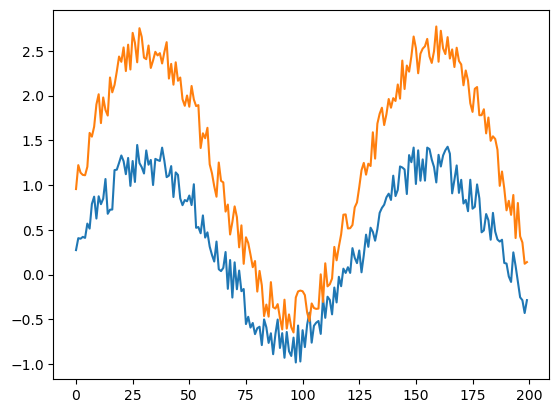

In [116]:
ts1 = pd.Series([np.sin(float(x)/20.)+np.random.rand()/2. for x in range(200)])
ts2 = pd.Series([1.5*np.sin(float(x)/20.)+np.random.rand()/2.+0.8 for x in range(200)])
plt.plot(ts1)
plt.plot(ts2)
plt.show()

### Offset Translation

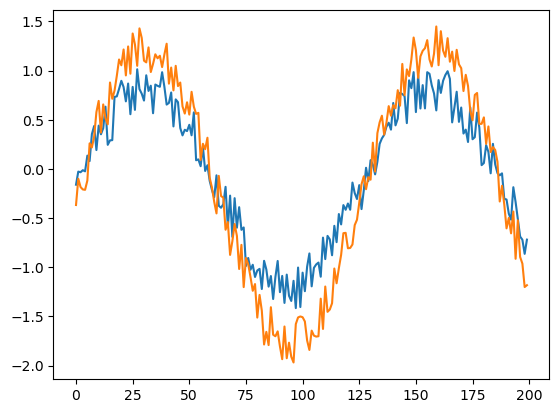

In [117]:
plt.plot(ts1 - ts1.mean())
plt.plot(ts2 - ts2.mean())
plt.show()

### Amplitude scaling

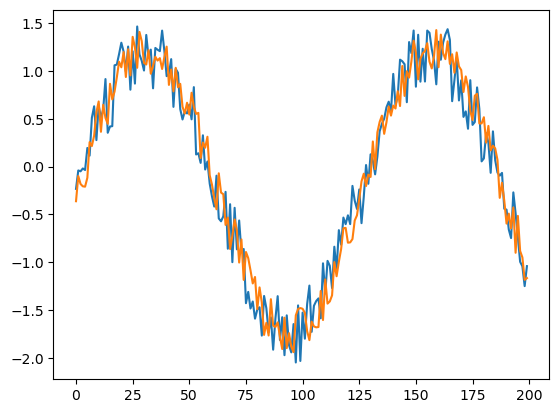

In [118]:
plt.plot((ts1 - ts1.mean())/ts1.std())
plt.plot((ts2 - ts2.mean())/ts2.std())
plt.show()

### Linear trend

To better visualize the linear trend

In [119]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
df = pd.read_csv('./datasets/AirPassengers.csv', parse_dates=True, index_col='Month', date_parser=dateparse)
df.head()

C:\Users\Utente\AppData\Local\Temp\ipykernel_1600\3314540588.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


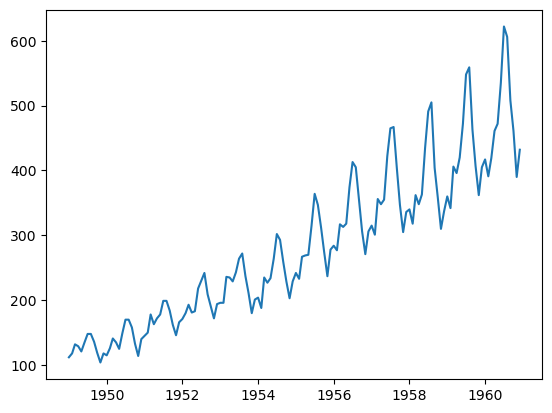

In [120]:
ts = df['#Passengers']
plt.plot(ts)
plt.show()

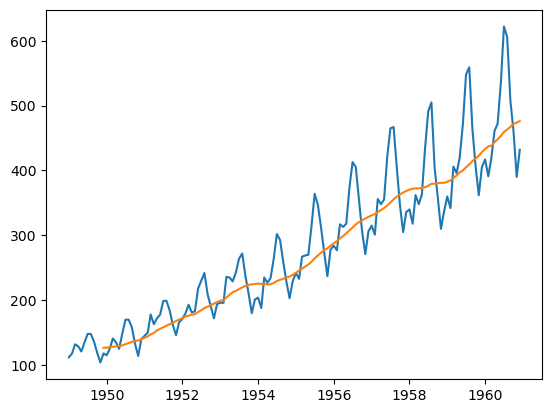

In [121]:
plt.plot(ts)
plt.plot(ts.rolling(window=12).mean())
plt.show()

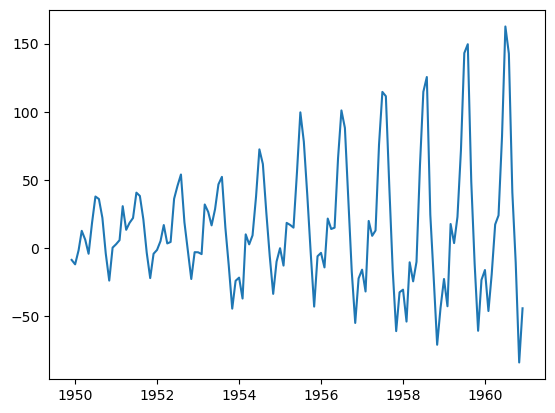

In [122]:
ts_shift = ts - ts.rolling(window=12).mean()
plt.plot(ts_shift)
plt.show()

### Noise 

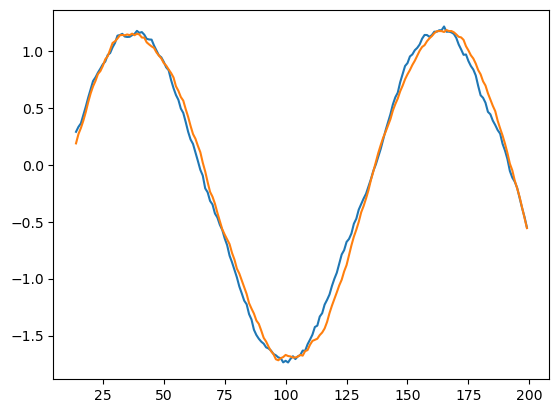

In [123]:
#noise can be removed by using a moving average to smooth the time series
w = 15
plt.plot(((ts1 - ts1.mean())/ts1.std()).rolling(window=w).mean())
plt.plot(((ts2 - ts2.mean())/ts2.std()).rolling(window=w).mean())
plt.show()

An alternative: tslearn. It is a Python package for time series analysis. It has 3 preprocessing for time series: scaler mean-variance, scaler min-max, resemple. 

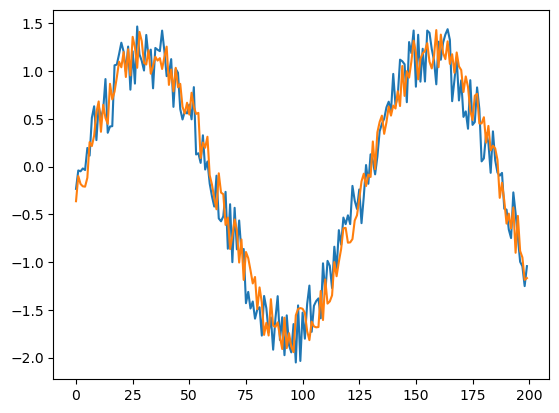

In [124]:
#scaler mean variance
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
scaler = TimeSeriesScalerMeanVariance(mu=0, std=1)  
ts1_scaled = scaler.fit_transform(ts1.values.reshape(1, -1)).flatten()
ts2_scaled = scaler.fit_transform(ts2.values.reshape(1, -1)).flatten()

plt.plot(ts1_scaled)
plt.plot(ts2_scaled)
plt.show()

### Min-max scaler

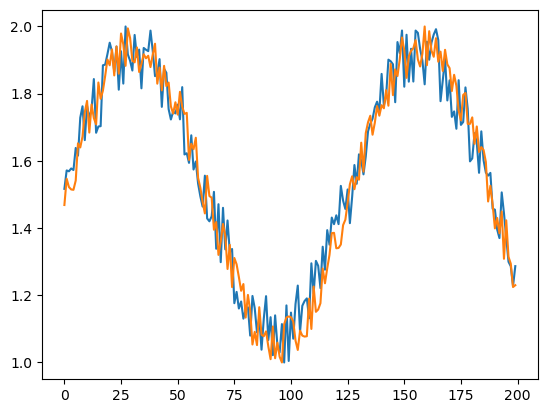

In [125]:
#scaler min-max
from tslearn.preprocessing import TimeSeriesScalerMinMax
scaler = TimeSeriesScalerMinMax(value_range=(1., 2.))  
ts1_scaled = scaler.fit_transform(ts1.values.reshape(1, -1)).flatten()
ts2_scaled = scaler.fit_transform(ts2.values.reshape(1, -1)).flatten()

plt.plot(ts1_scaled)
plt.plot(ts2_scaled)
plt.show()

### Resampler

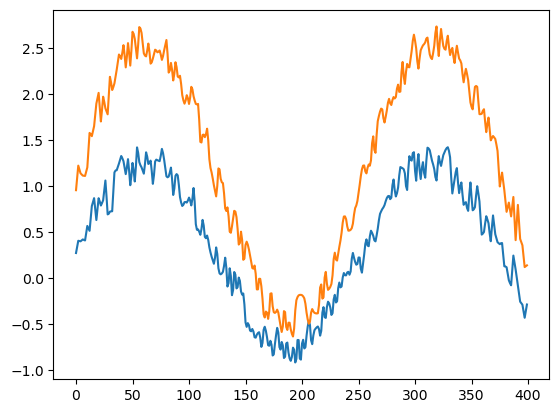

In [126]:
#resampler
#Resampler for time series. 
#Resample time series so that they reach the target size.
from tslearn.preprocessing import TimeSeriesResampler
scaler = TimeSeriesResampler(sz=400)  
ts1_scaled = scaler.fit_transform(ts1.values.reshape(1, -1)).flatten()
ts2_scaled = scaler.fit_transform(ts2.values.reshape(1, -1)).flatten()

plt.plot(ts1_scaled)
plt.plot(ts2_scaled)
plt.show()

## 2. Distance between 2 time series
We can calculate the distance between 2 time series in different ways: euclidean, hamming, cityblock etc. 

In [127]:
from scipy.spatial.distance import euclidean, cityblock

In [128]:
dist = euclidean(ts1, ts2)
dist

13.707011611268332

In [129]:
dist = cityblock(ts1, ts2)
dist

177.86683406780986

### Dynamic Time Warping 
It is a similarity measure between 2 time series. It oputputs the similarity score. The idea is that, differently from the euclidean distance, given the matrix of distance between two time series, the dtw can freely move outside the diagonal of the matrix. These cells are actually temporally shifted points in the 2 time series. 


There are many parameters to set: global_constraint, it can be “itakura” or “sakoe_chiba” or None (that is the deafult). If None is set, then there is no constraint, otherwise the dtw can only move in a range of distance from the diagonal. If global_constraint = “itakura”, then you have to set also itakura_max_slope with a float: the itakura method creates a parallelogram hence you have to set the constraint slope. If the global method is sakoe_chiba, then you have to set sakoe_chiba_radius with an integer.  
NB: if you set both sakoe_chiba_radius and itakura_max_slope the method infer which one is better.

In [130]:
#this applies euclidean distance 
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

In [131]:
#deafult one 
dist = dtw(ts1, ts2)
dist

8.589571189054032

In [132]:
#deafult + path selected 
path, dist = dtw_path(ts1, ts2)
path

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 0),
 (10, 0),
 (11, 0),
 (12, 0),
 (13, 0),
 (14, 0),
 (15, 0),
 (16, 0),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 2),
 (23, 3),
 (24, 4),
 (25, 5),
 (26, 5),
 (27, 6),
 (27, 7),
 (27, 8),
 (27, 9),
 (27, 10),
 (27, 11),
 (27, 12),
 (27, 13),
 (27, 14),
 (27, 15),
 (27, 16),
 (27, 17),
 (27, 18),
 (27, 19),
 (27, 20),
 (27, 21),
 (27, 22),
 (27, 23),
 (27, 24),
 (27, 25),
 (27, 26),
 (27, 27),
 (27, 28),
 (27, 29),
 (27, 30),
 (27, 31),
 (27, 32),
 (27, 33),
 (27, 34),
 (27, 35),
 (27, 36),
 (27, 37),
 (27, 38),
 (27, 39),
 (27, 40),
 (27, 41),
 (27, 42),
 (27, 43),
 (27, 44),
 (27, 45),
 (27, 46),
 (27, 47),
 (27, 48),
 (27, 49),
 (27, 50),
 (27, 51),
 (27, 52),
 (27, 53),
 (27, 54),
 (27, 55),
 (27, 56),
 (27, 57),
 (27, 58),
 (28, 59),
 (29, 59),
 (30, 59),
 (31, 59),
 (32, 59),
 (33, 59),
 (34, 60),
 (34, 61),
 (34, 62),
 (35, 63),
 (36, 63),
 (37, 63),
 (38, 63),
 (39, 63),
 (40, 6

### Can we visualize the path took?

#### sakoe-chiba

In [133]:
#we compute the path 
path, dist = dtw_path(ts1[:10], ts2[:10], global_constraint="sakoe_chiba", sakoe_chiba_radius=3)
dist

2.470703977765806

In [134]:
path

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 1),
 (5, 2),
 (6, 3),
 (7, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (9, 9)]

In [135]:
from scipy.spatial.distance import cdist

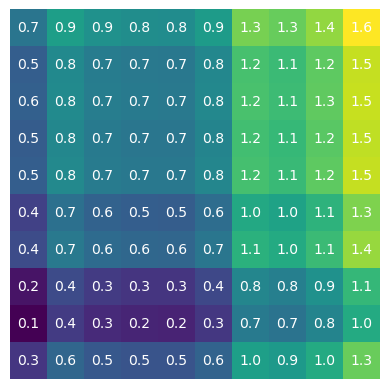

In [136]:
mat = cdist(ts1.values[:10].reshape(-1,1), ts2.values[:10].reshape(-1,1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
        
plt.show()

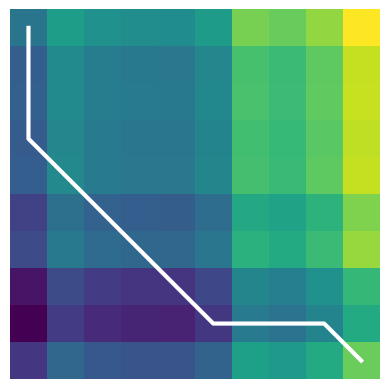

In [137]:
#we compute the distance (default euclidean)
mat = cdist(ts1.values[:10].reshape(-1,1), ts2.values[:10].reshape(-1,1))
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

### DTW: another implementation
From pyts there is another implementation of DTW. Here there are different parameters to set: 

1. dist, to select the distance used (square, absolute, precomputed or callable), 

2. the method: fast, itakura, sakoechiba etc., 

3. options: to specify the window size for sakoechiba, the max_slope for itakura or the radius for fast. 

In [138]:
#here you can change the distance measure 
from pyts.metrics import dtw as dtw2

In [139]:
sim, path = dtw2(ts1[:10].ravel(), ts2[:10].ravel(), dist='square', method='itakura', return_path=True)

In [140]:
path

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9],
       [0, 1, 2, 3, 4, 4, 5, 6, 7, 8, 9]], dtype=int64)

In [141]:
path[0]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9], dtype=int64)

In [142]:
new_p = list()
for i in range(0, len(path[0])):
    new_p.append((path[0][i], path[1][i]))

In [143]:
new_p

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 4),
 (6, 5),
 (7, 6),
 (8, 7),
 (8, 8),
 (9, 9)]

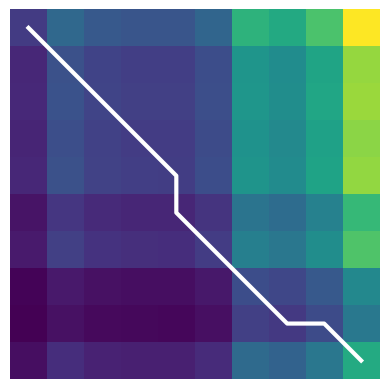

In [146]:
#we compute the distance (default euclidean)
mat = cdist(ts1.values[:10].reshape(-1,1), ts2.values[:10].reshape(-1,1), 'sqeuclidean')
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in new_p], [i for (i, j) in new_p], "w-", linewidth=3.)
plt.show()

# 3. Structure-based similarity
The idea is to extract features from the time series, create a feature vector and use it to measure similarity.

In [147]:
#define a function to extract statistical features
import scipy.stats as stats
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [148]:
features1 = calculate_features(ts1)
features2 = calculate_features(ts2)

In [149]:
list(features1.values())

[0.4354477890507383,
 0.6905227875006258,
 0.47682172005763435,
 0.5110494143817508,
 -0.5912552613738186,
 -0.13279234432804748,
 0.5110494143817508,
 1.0493941608526856,
 1.2708724273239904,
 1.182186505180733,
 0.6306059654118853,
 -0.371445317905054,
 -1.0726515347984555]

Compute the distance between the features extracted from the 2 time series

In [150]:
euclidean(list(features1.values()), list(features2.values()))

2.786080578047982

https://tsfresh.readthedocs.io/en/latest/text/list_of_features.html

# 4. Compression-based dissimilarity

d(x, y) = CDM(x, y) = c(x,y)/c(x)+c(y)

In [151]:
import zlib
#definition of CDM
def CDM(x, y):
    return len(zlib.compress(x + y)) / (len(zlib.compress(x)) + len(zlib.compress(y)))

In [152]:
ts1_enc = (' '.join([str(v) for v in ts1])).encode('utf-8')
ts2_enc = (' '.join([str(v) for v in ts2])).encode('utf-8')

In [153]:
CDM(ts1_enc, ts2_enc)

0.9937007874015747

# 5. Approximation of time series

Compression and approximation are 2 ways for dimensionality reduction: compression is in a space not always understandable, while the approximation is in a simpler space, always understandable. 

### Piece-wise Aggregate Approximation

It approximates a TS by dividing it into equal-length segments and recording the mean value of the data points that fall within the segment.

In [154]:
from tslearn.piecewise import PiecewiseAggregateApproximation
#first re-scale the time series with the functions seen above.
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  
ts1 = scaler.fit_transform(ts1.values.reshape(1,-1))
ts2 = scaler.fit_transform(ts2.values.reshape(1,-1))


In [155]:
#select the number of segments to compute 
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts1_paa = paa.fit_transform(ts1)
paa_dataset_inv1 = paa.inverse_transform(ts1_paa)

paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts2_paa = paa.fit_transform(ts2)
paa_dataset_inv2 = paa.inverse_transform(ts2_paa)

In [157]:
ts1_paa

array([[[ 4.25611976e-01],
        [ 1.16292930e+00],
        [ 5.17582434e-01],
        [-7.91675480e-01],
        [-1.68386785e+00],
        [-1.18766782e+00],
        [-9.03860623e-04],
        [ 1.07430615e+00],
        [ 8.48755662e-01],
        [-3.65070513e-01]]])

In [158]:
paa_dataset_inv1

array([[[ 4.25611976e-01],
        [ 4.25611976e-01],
        [ 4.25611976e-01],
        [ 4.25611976e-01],
        [ 4.25611976e-01],
        [ 4.25611976e-01],
        [ 4.25611976e-01],
        [ 4.25611976e-01],
        [ 4.25611976e-01],
        [ 4.25611976e-01],
        [ 4.25611976e-01],
        [ 4.25611976e-01],
        [ 4.25611976e-01],
        [ 4.25611976e-01],
        [ 4.25611976e-01],
        [ 4.25611976e-01],
        [ 4.25611976e-01],
        [ 4.25611976e-01],
        [ 4.25611976e-01],
        [ 4.25611976e-01],
        [ 1.16292930e+00],
        [ 1.16292930e+00],
        [ 1.16292930e+00],
        [ 1.16292930e+00],
        [ 1.16292930e+00],
        [ 1.16292930e+00],
        [ 1.16292930e+00],
        [ 1.16292930e+00],
        [ 1.16292930e+00],
        [ 1.16292930e+00],
        [ 1.16292930e+00],
        [ 1.16292930e+00],
        [ 1.16292930e+00],
        [ 1.16292930e+00],
        [ 1.16292930e+00],
        [ 1.16292930e+00],
        [ 1.16292930e+00],
 

### Symbolic Aggregate Approximation

Convert the data into a discrete format, with a small alphabet size

In [159]:
from tslearn.piecewise import SymbolicAggregateApproximation
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts1_sax = sax.fit_transform(ts1)
sax_dataset_inv1 = sax.inverse_transform(ts1_sax)

sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts2_sax = sax.fit_transform(ts2)
sax_dataset_inv2 = sax.inverse_transform(ts2_sax)

### One Dymensional Symbolc Aggregate Approximation

We can assign a slope to the segments

In [161]:
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
n_sax_symbols_avg = 8
n_sax_symbols_slope = 4
one_d_sax = OneD_SymbolicAggregateApproximation(
    n_segments=n_paa_segments,
    alphabet_size_avg=n_sax_symbols_avg,
    alphabet_size_slope=n_sax_symbols_slope)

ts1_sax1d = one_d_sax.fit_transform(ts1)
one_d_sax_dataset_inv1 = one_d_sax.inverse_transform(ts1_sax1d)

ts2_sax1d = one_d_sax.fit_transform(ts2)
one_d_sax_dataset_inv2 = one_d_sax.inverse_transform(ts2_sax1d)

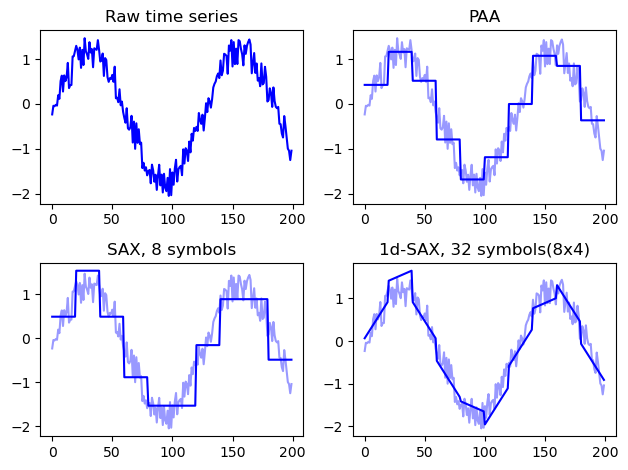

In [162]:
#visualization of just 1 time series
plt.figure()
plt.subplot(2, 2, 1)  # First, raw time series
plt.plot(ts1[0].ravel(), "b-")
plt.title("Raw time series")

plt.subplot(2, 2, 2)  # Second, PAA
plt.plot(ts1[0].ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv1[0].ravel(), "b-")
plt.title("PAA")

plt.subplot(2, 2, 3)  # Then SAX
plt.plot(ts1[0].ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv1[0].ravel(), "b-")
plt.title("SAX, %d symbols" % n_sax_symbols)

plt.subplot(2, 2, 4)  # Finally, 1d-SAX
plt.plot(ts1[0].ravel(), "b-", alpha=0.4)
plt.plot(one_d_sax_dataset_inv1[0].ravel(), "b-")
plt.title("1d-SAX, %d symbols"
          "(%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope,
                       n_sax_symbols_avg,
                       n_sax_symbols_slope))

plt.tight_layout()
plt.show()

We can compare the 2 time series.

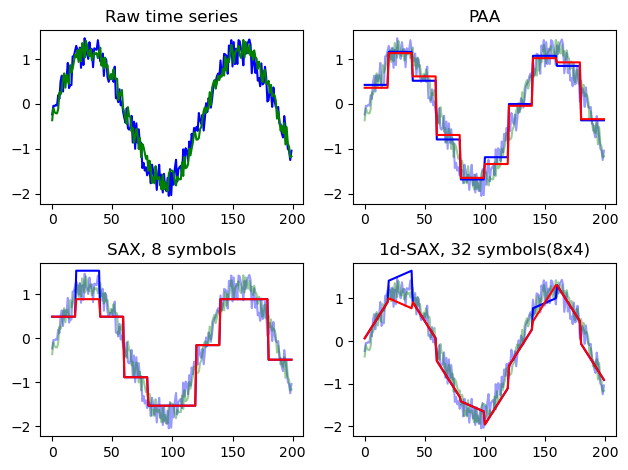

In [165]:
plt.figure()
plt.subplot(2, 2, 1)  
plt.plot(ts1[0].ravel(), "b-")
plt.plot(ts2[0].ravel(), "g-")
plt.title("Raw time series")

plt.subplot(2, 2, 2)
plt.plot(ts1[0].ravel(), "b-", alpha=0.4)
plt.plot(ts2[0].ravel(), "g-", alpha=0.4)
plt.plot(paa_dataset_inv1[0].ravel(), "b-")
plt.plot(paa_dataset_inv2[0].ravel(), "r-")
plt.title("PAA")

plt.subplot(2, 2, 3) 
plt.plot(ts1[0].ravel(), "b-", alpha=0.4)
plt.plot(ts2[0].ravel(), "g-", alpha=0.4)
plt.plot(sax_dataset_inv1[0].ravel(), "b-")
plt.plot(sax_dataset_inv2[0].ravel(), "r-")
plt.title("SAX, %d symbols" % n_sax_symbols)

plt.subplot(2, 2, 4)  
plt.plot(ts1[0].ravel(), "b-", alpha=0.4)
plt.plot(ts2[0].ravel(), "g-", alpha=0.4)
plt.plot(one_d_sax_dataset_inv1[0].ravel(), "b-")
plt.plot(one_d_sax_dataset_inv2[0].ravel(), "r-")
plt.title("1d-SAX, %d symbols"
          "(%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope,
                       n_sax_symbols_avg,
                       n_sax_symbols_slope))

plt.tight_layout()
plt.show()

We can see the difference between the 2 approximated time series by exploiting the compression function defined above.

In [166]:
ts1_sax_enc = (' '.join([str(v) for v in ts1_sax1d])).encode('utf-8')
ts2_sax_enc = (' '.join([str(v) for v in ts2_sax1d])).encode('utf-8')

In [167]:
CDM(ts1_sax_enc, ts2_sax_enc)

0.6413043478260869

In [168]:
ts1_paa_enc = (' '.join([str(v) for v in ts1_paa])).encode('utf-8')
ts2_paa_enc = (' '.join([str(v) for v in ts2_paa])).encode('utf-8')

In [169]:
CDM(ts1_paa_enc, ts2_paa_enc)

0.8292682926829268